In [1]:
from dataset.dataloader import CnnDataset
import pathlib
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [132]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

## Figure 1: Dataset and Masking

In [5]:
with open("./dataset/categories_50.txt", "r") as f:
    categories_50 = [line.strip().split(",")[0] for line in f.readlines() if line]

In [6]:
def transform(bitmap):
    return np.reshape(bitmap, (28, 28))

In [7]:
dataset = CnnDataset(
    data_base_dir="./data",
    split="test",
    categories=categories_50,
    transform=transform,
)

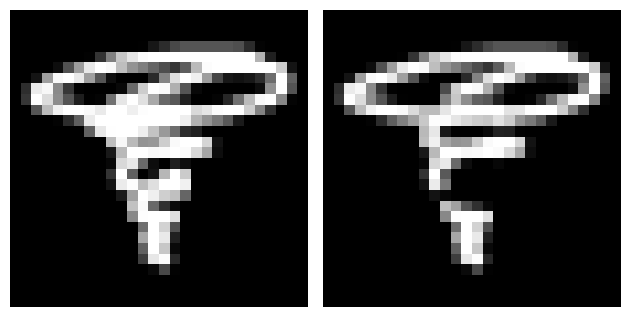

tornado


In [102]:
image, image_masked, label = dataset[42530]
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image, cmap="gray")
axes[1].imshow(image_masked, cmap="gray")
axes[0].set_axis_off()
axes[1].set_axis_off()
plt.tight_layout()
plt.show()
print(label)

In [103]:
selected = [33551, 16551, 42530]

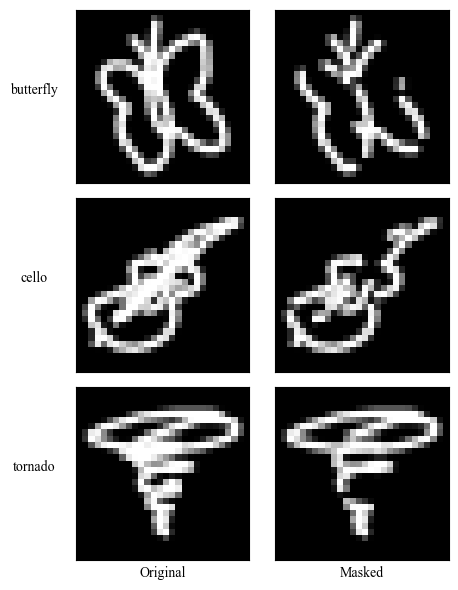

In [130]:
fig, axes = plt.subplots(3, 2, figsize=(5, 6))
for i in range(3):
    image, image_masked, label = dataset[selected[i]]
    axes[i][0].imshow(image, cmap="gray")
    axes[i][1].imshow(image_masked, cmap="gray")
    axes[i][0].set_ylabel(label, loc="center", rotation=0, labelpad=30)
    axes[i][0].set_xticks([])
    axes[i][1].set_xticks([])
    axes[i][0].set_yticks([])
    axes[i][1].set_yticks([])
axes[-1][0].set_xlabel("Original", loc="center")
axes[-1][1].set_xlabel("Masked", loc="center")
plt.tight_layout()
fig.savefig("./save/figure1.pdf", bbox_inches="tight")
plt.show()

## Figure 2 & 3: Training Losses

In [131]:
import json

In [133]:
with open("./save/mobilenet_finetune_loss.json", "r") as f:
    mobilenet_loss = json.load(f)
with open("./save/mobilenet_masked_finetune_loss.json", "r") as f:
    mobilenet_masked_loss = json.load(f)
with open("./save/mobilevit_finetune_loss.json", "r") as f:
    mobilevit_loss = json.load(f)
with open("./save/mobilenet_masked_finetune_loss.json", "r") as f:
    mobilevit_masked_loss = json.load(f)

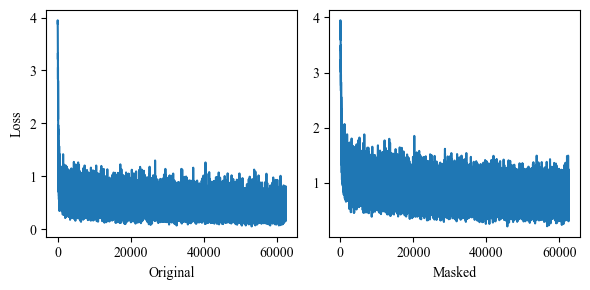

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].plot(mobilenet_loss)
axes[1].plot(mobilenet_masked_loss)
axes[0].set_ylabel("Loss", loc="center")
axes[0].set_xlabel("Original")
axes[1].set_xlabel("Masked")
plt.tight_layout()
fig.savefig("save/figure2.pdf", bbox_inches="tight")
plt.show()

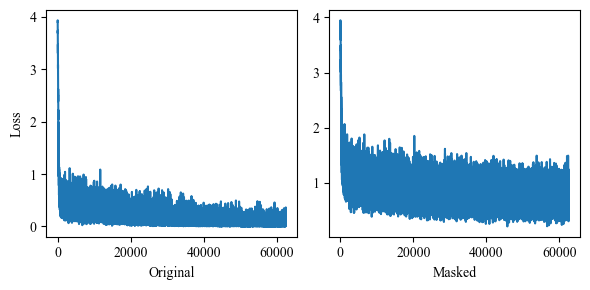

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].plot(mobilevit_loss)
axes[1].plot(mobilevit_masked_loss)
axes[0].set_ylabel("Loss", loc="center")
axes[0].set_xlabel("Original")
axes[1].set_xlabel("Masked")
plt.tight_layout()
fig.savefig("save/figure3.pdf", bbox_inches="tight")
plt.show()